## Exercise: EDA on the Bike Sharing Dataset

Do exploratory analysis on the bike sharing dataset by calculating and interpreting summary statistics, creating basic plots, and calculating correlations.

Run the following cell to set up our environment.

In [0]:
%run "./Includes/Classroom-Setup"

Initialized classroom variables & functions...

Datasets are already mounted to /mnt/training from wasbs://training@dbtrainwesteurope.blob.core.windows.net/

Created user-specific database

Using the database saifahmed_k_outlook_com_db .

All done!

### Step 1: Summary Statistics

Calculate the count, mean, and standard deviation for each variable in the dataset.  What does each variable signify?  What is the spread of the data?

Import the data.

In [0]:
%fs ls dbfs:/databricks-datasets/bikeSharing/data-001/hour.csv



path,name,size,modificationTime
dbfs:/databricks-datasets/bikeSharing/data-001/hour.csv,hour.csv,1156736,1455505275000


In [0]:
bikeDF = (spark
  .read
  .option("header", True)
  .option("inferSchema", True)
  .csv("dbfs:/databricks-datasets/bikeSharing/data-001/hour.csv")
  .drop("instant", "dteday", "casual", "registered", "holiday", "weekday")
)

Calculate count, mean, and standard deviation.

In [0]:


from pyspark.sql.functions import mean, stddev, count

statsDF = bikeDF.select(
    count("*").alias("count"),
    mean("cnt").alias("mean"),
    stddev("cnt").alias("stddev")
)

display(statsDF)

count,mean,stddev
17379,189.46308763450142,181.38759909186473


### Step 2: Plotting

Create the following plots:<br><br>

1. A histogram of the dependent variable `cnt`
2. A barplot of counts by hour
3. A scattermatrix

Create a histogram of the variable `cnt`.

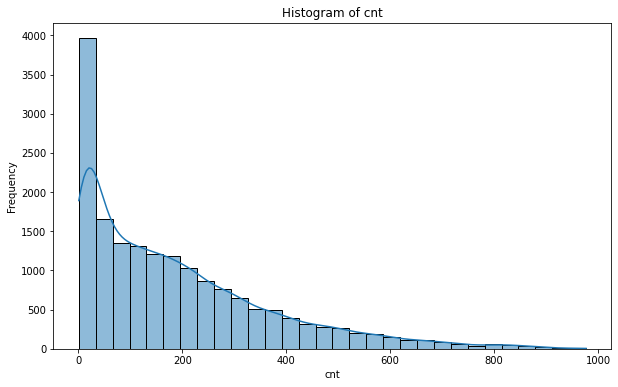

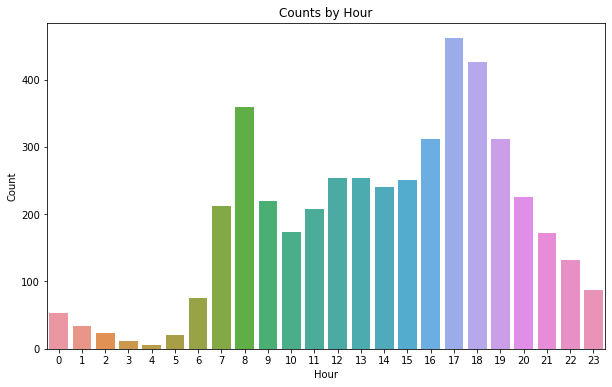

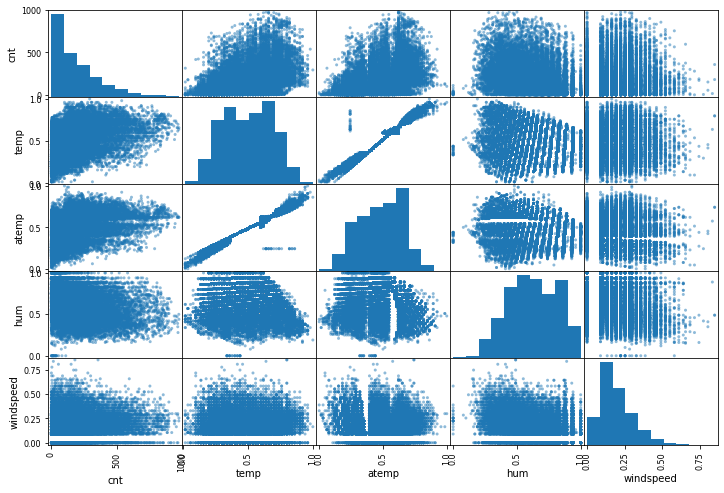

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Convert Spark DataFrame to Pandas DataFrame for plotting
bike_pdDF = bikeDF.toPandas()

# Histogram of the dependent variable cnt
plt.figure(figsize=(10, 6))
sns.histplot(bike_pdDF['cnt'], bins=30, kde=True)
plt.title('Histogram of cnt')
plt.xlabel('cnt')
plt.ylabel('Frequency')
plt.show()

# Barplot of counts by hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=bike_pdDF, ci=None)
plt.title('Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Scatter matrix
scatter_matrix(bike_pdDF[['cnt', 'temp', 'atemp', 'hum', 'windspeed']], figsize=(12, 8))
plt.show()

Create a barplot of counts by hour.

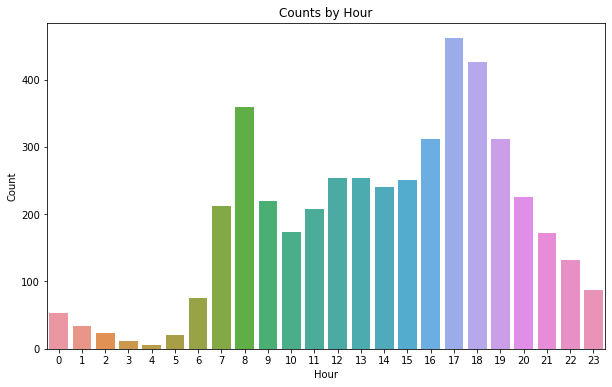

In [0]:
# Convert Spark DataFrame to Pandas DataFrame for plotting
bike_pdDF = bikeDF.toPandas()

# Barplot of counts by hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=bike_pdDF, ci=None)
plt.title('Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

Create a scattermatrix.  This can be done in Python or with the built-in Databricks functionality.

In [0]:
# Create a scatter matrix using Databricks built-in functionality
display(bikeDF.select('cnt', 'temp', 'atemp', 'hum', 'windspeed'))

cnt,temp,atemp,hum,windspeed
16,0.24,0.2879,0.81,0.0
40,0.22,0.2727,0.8,0.0
32,0.22,0.2727,0.8,0.0
13,0.24,0.2879,0.75,0.0
1,0.24,0.2879,0.75,0.0
1,0.24,0.2576,0.75,0.0896
2,0.22,0.2727,0.8,0.0
3,0.2,0.2576,0.86,0.0
8,0.24,0.2879,0.75,0.0
14,0.32,0.3485,0.76,0.0


### Step 3: Correlations

Calculate the correlations of the different variables.  Start by using `VectorAssembler` to put all the variables into a single column `features`.

In [0]:
# TODO
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['temp', 'atemp', 'hum', 'windspeed'], outputCol='features')

Calculate the correlation on the transformed `bikeDF`

In [0]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import StructType, StructField, DoubleType
import pandas as pd


# Drop the existing 'features' column if it exists
if 'features' in bikeDF.columns:
    bikeDF = bikeDF.drop('features')

assembler = VectorAssembler(
    inputCols=bikeDF.columns,
    outputCol="features"
)
bikeDF = assembler.transform(bikeDF)

# Calculate the correlation matrix
pearsonCorr = Correlation.corr(bikeDF, 'features').head()[0]

# Convert DenseMatrix to DataFrame
num_features = len(bikeDF.columns) - 1  # Exclude the 'features' column
schema = StructType([
    StructField(bikeDF.columns[i], DoubleType(), True)
    for i in range(num_features)
])
corrMatrix = spark.createDataFrame(
    pearsonCorr.toArray().tolist(),
    schema=schema
)

# Convert to Pandas DataFrame
pandasDF = corrMatrix.toPandas()

display(pandasDF)

season,yr,mnth,hr,workingday,weathersit,temp,atemp,hum,windspeed,cnt
1.0,-0.010742486207838518,0.8303858922039994,-0.006116900866195885,0.013743101747054915,-0.014523552139124115,0.31202523725738535,0.31937981095885454,0.1506247454039175,-0.14977275116518457,0.17805573098265653
-0.010742486207838518,1.0,-0.01047292881666889,-0.0038670049493320984,-0.002196005414265053,-0.019156853236259142,0.04091337951164603,0.039221594595942405,-0.08354642088343188,-0.008739532933445971,0.2504948988596273
0.8303858922039994,-0.01047292881666889,1.0,-0.005771908829882771,-0.003476921794861432,0.005399521906108059,0.20169149360984404,0.20809613091745324,0.16441144337578475,-0.13538632320500343,0.12063776021314734
-0.006116900866195885,-0.0038670049493320984,-0.005771908829882771,1.0,0.0022849981041432317,-0.020202528398647123,0.1376034938656076,0.13374996473160408,-0.2764978279048487,0.1372515675009335,0.39407149778293477
0.013743101747054915,-0.002196005414265053,-0.003476921794861432,0.0022849981041432317,1.0,0.04467222379747942,0.05539031705723523,0.0546672346401405,0.015687512350784295,-0.011829789356500451,0.030284367747909217
-0.014523552139124115,-0.019156853236259142,0.005399521906108059,-0.020202528398647123,0.04467222379747942,1.0,-0.10263993557968416,-0.10556310792660524,0.4181303287517713,0.02622565248740771,-0.14242613813808394
0.31202523725738535,0.04091337951164603,0.20169149360984404,0.1376034938656076,0.05539031705723523,-0.10263993557968416,1.0,0.9876721390396597,-0.06988139105119397,-0.02312526248533064,0.40477227577865804
0.31937981095885454,0.039221594595942405,0.20809613091745324,0.13374996473160408,0.0546672346401405,-0.10556310792660524,0.9876721390396597,1.0,-0.05191769599336562,-0.06233604268695463,0.4009293041266179
0.1506247454039175,-0.08354642088343188,0.16441144337578475,-0.2764978279048487,0.015687512350784295,0.4181303287517713,-0.06988139105119397,-0.05191769599336562,1.0,-0.29010489506384174,-0.3229107408245599
-0.14977275116518457,-0.008739532933445971,-0.13538632320500343,0.1372515675009335,-0.011829789356500451,0.02622565248740771,-0.02312526248533064,-0.06233604268695463,-0.29010489506384174,1.0,0.09323378392612196
